<a href="https://colab.research.google.com/github/MakhtoutMohamed/OpenCV2/blob/main/Assignment2_KNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision | TP n°2

- Nom : Mohamed Makhtout
- Cours : Computer Vision
- Sujet : KNN sur CIFAR-10 avec 5-fold cross-validation
- Objectif : retrouver la courbe "Cross-validation on k" du sujet.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

np.random.seed(42)


In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),  # [0,1]
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

N = len(trainset)
print("Nombre d'images train :", N)

num_samples = 5000
indices = np.random.choice(N, num_samples, replace=False)

X_list = []
y_list = []
for idx in indices:
    img, label = trainset[idx]
    X_list.append(img.view(-1).numpy())
    y_list.append(label)

X = np.stack(X_list, axis=0)
y = np.array(y_list)

print("X shape :", X.shape)
print("y shape :", y.shape)


Nombre d'images train : 50000
X shape : (5000, 3072)
y shape : (5000,)


In [9]:
k_values = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_to_accuracies = {}

for k in k_values:
    print(f"\n=== k = {k} ===")
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='minkowski',
        p=2,
        n_jobs=-1
    )

    scores = cross_val_score(
        knn,
        X, y,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    k_to_accuracies[k] = scores
    print("Scores par fold :", scores)
    print("Moyenne :", scores.mean(), " / Std :", scores.std())



=== k = 1 ===
Scores par fold : [0.277 0.266 0.282 0.263 0.256]
Moyenne : 0.26880000000000004  / Std : 0.009453041838477172

=== k = 3 ===
Scores par fold : [0.253 0.253 0.266 0.259 0.248]
Moyenne : 0.2558  / Std : 0.0061773780845922055

=== k = 5 ===
Scores par fold : [0.265 0.271 0.278 0.271 0.248]
Moyenne : 0.2666  / Std : 0.010170545708072905

=== k = 8 ===
Scores par fold : [0.262 0.261 0.272 0.271 0.268]
Moyenne : 0.26680000000000004  / Std : 0.004534313619501858

=== k = 10 ===
Scores par fold : [0.254 0.265 0.267 0.264 0.265]
Moyenne : 0.263  / Std : 0.004604345773288539

=== k = 12 ===
Scores par fold : [0.264 0.269 0.266 0.263 0.257]
Moyenne : 0.2638  / Std : 0.003969886648255845

=== k = 15 ===
Scores par fold : [0.26  0.264 0.256 0.267 0.265]
Moyenne : 0.2624000000000001  / Std : 0.003929376540877704

=== k = 20 ===
Scores par fold : [0.257 0.261 0.256 0.273 0.26 ]
Moyenne : 0.2614  / Std : 0.006086049621881182

=== k = 50 ===
Scores par fold : [0.266 0.248 0.26  0.242 0.2

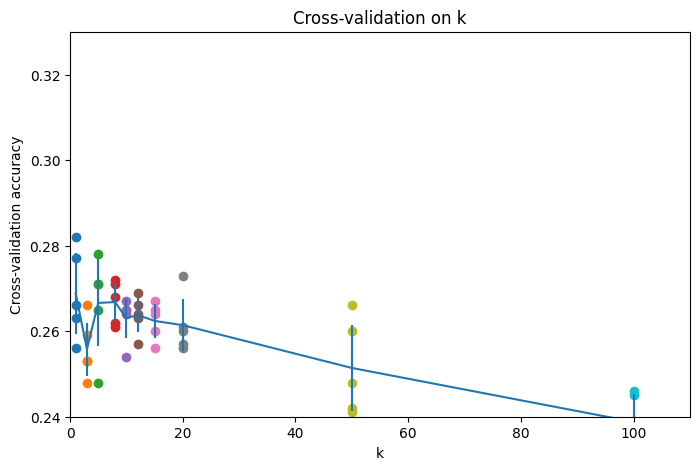

In [10]:
plt.figure(figsize=(8,5))

for k, accuracies in k_to_accuracies.items():
    plt.scatter([k] * len(accuracies), accuracies)

k_sorted = sorted(k_to_accuracies.keys())
means = [k_to_accuracies[k].mean() for k in k_sorted]
stds  = [k_to_accuracies[k].std()  for k in k_sorted]

plt.errorbar(k_sorted, means, yerr=stds)

plt.title("Cross-validation on k")
plt.xlabel("k")
plt.ylabel("Cross-validation accuracy")
plt.ylim(0.24, 0.33)
plt.xlim(0, 110)
plt.show()

In [11]:
best_k = None
best_acc = -1.0

for k in k_sorted:
    mean_acc = k_to_accuracies[k].mean()
    if mean_acc > best_acc:
        best_acc = mean_acc
        best_k = k

print(f"Meilleur k = {best_k} avec accuracy moyenne = {best_acc:.4f}")

Meilleur k = 1 avec accuracy moyenne = 0.2688
